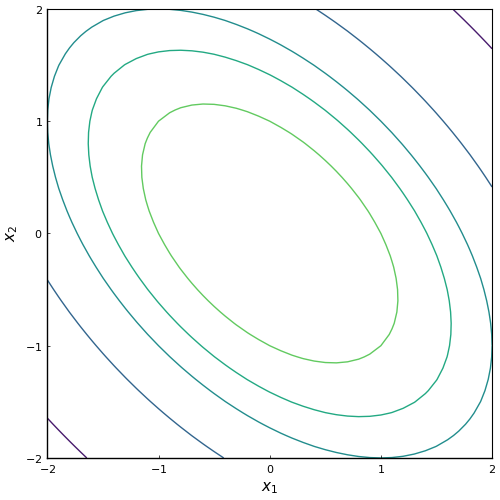

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [195]:
# Example of backtracking line search
using Plots, LaTeXStrings
pyplot()

x1 = -2:.1:2
x2 = -2:.1:2

f(x1, x2) = x1^2 + x1*x2 + x2^2

contour(x1, x2, f, framestyle = :box,
    levels = [1,2,3,5,10,20,50,100], 
    c = cgrad(:viridis, rev = true, scale = :exp),
    ylab = L"x_2", 
    xlab = L"x_1",
    xlims = (-2,2),
    ylims = (-2,2),
    legend = false,
    grid = false,
    size = [500,500])

In [196]:
# Sufficient decrease condition

x = [1,2]
d = [-1,-1]
β = 1e-4
p = 0.5
α = 10
f(x) = x[1]^2 + x[1]*x[2] + x[2]^2
∇f(x) = [2x[1] + x[2], x[1] + 2x[2]]

∇f (generic function with 1 method)

In [197]:
println("α = ", α)
println(f(x + α*d), " <= ", f(x) + β*α*∇f(x)'*d)
f(x + α*d) <= (f(x) + β*α*∇f(x)'*d) ? "Condition satisfied" : "Condition not satisfied"

α = 10
217 <= 6.991


"Condition not satisfied"

In [198]:
α *= p
println("α = ", α)
println(f(x + α*d), " <= ", f(x) + β*α*∇f(x)'*d)
f(x + α*d) <= (f(x) + β*α*∇f(x)'*d) ? "Condition satisfied" : "Condition not satisfied"

α = 5.0
37.0 <= 6.9955


"Condition not satisfied"

In [199]:
α *= p
println("α = ", α)
println(f(x + α*d), " <= ", f(x) + β*α*∇f(x)'*d)
f(x + α*d) <= (f(x) + β*α*∇f(x)'*d) ? "Condition satisfied" : "Condition not satisfied"

α = 2.5
3.25 <= 6.99775


"Condition satisfied"

In [200]:
x = [1,2]
d = [-1,-1]
α = 10
f(x) = x[1]^2 + x[1]*x[2] + x[2]^2
∇f(x) = [2x[1] + x[2], x[1] + 2x[2]]

function backtracking_line_search(f, ∇f, x, d, α; p=0.5, β=1e-4)
    y, g = f(x), ∇f(x)
    while f(x + α*d) > y + β*α*(g'*d)
        α *= p
    end
    α
end

backtracking_line_search (generic function with 1 method)

In [201]:
α = backtracking_line_search(f, ∇f, x, d, 10)

2.5

In [202]:
xn = x + α*d

2-element Array{Float64,1}:
 -1.5
 -0.5

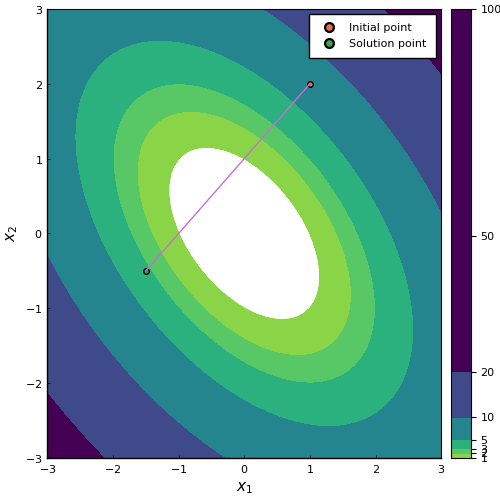

In [203]:
# Example of backtracking line search
using Plots, LaTeXStrings
pyplot()

x1 = -3:.1:3
x2 = -3:.1:3

f(x1, x2) = x1^2 + x1*x2 + x2^2

contour(x1, x2, f, framestyle = :box,
    levels = [1,2,3,5,10,20,50, 100], 
    c = cgrad(:viridis, rev = true, scale = :exp),
    ylab = L"x_2", 
    xlab = L"x_1",
    xlims = (-3,3),
    ylims = (-3,3),
    grid = false,
    fill = true,
    size = [500,500])
scatter!([x[1]], [x[2]], label="Initial point")
scatter!([xn[1]], [xn[2]], label="Solution point")
plot!([x[1], xn[1]], [x[2], xn[2]], label="")